In [18]:
# Importing all the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('drive/MyDrive/Data/shampoo.csv', parse_dates = [0])
df.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


<Axes: >

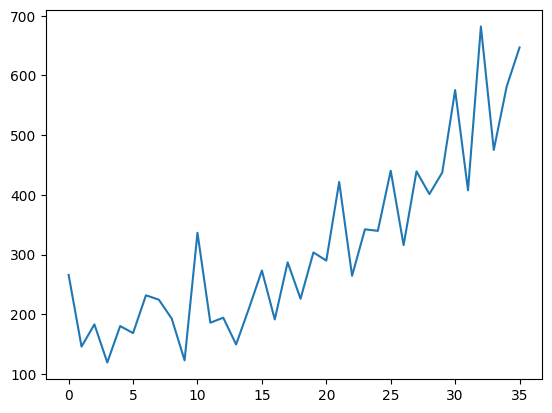

In [3]:
# Plotting the 'Sales' line graph

df['Sales'].plot()

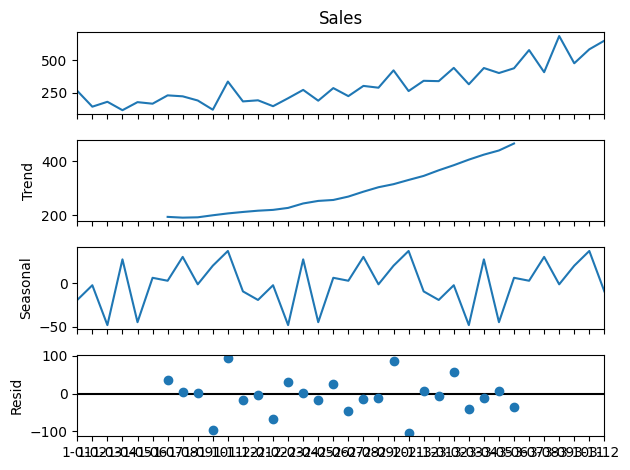

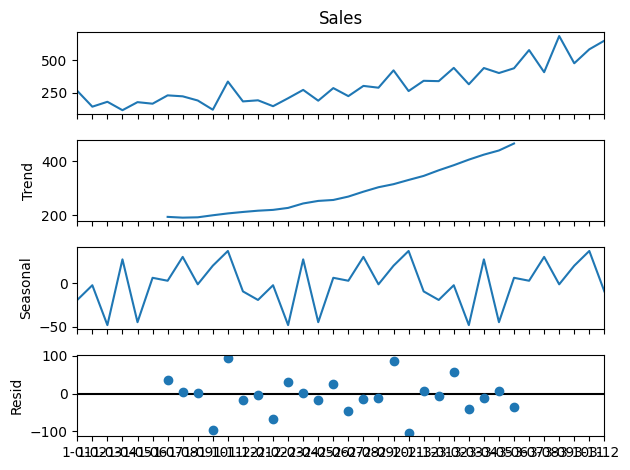

In [4]:
df.set_index('Month', inplace = True)
seasonal_decompose(df['Sales'], model = 'additive', period = 12).plot()

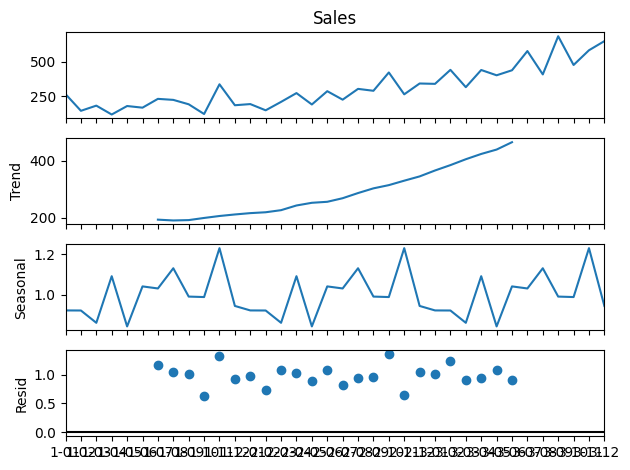

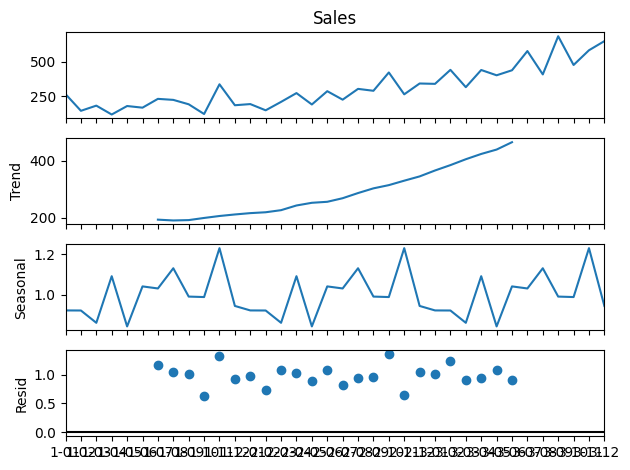

In [5]:
seasonal_decompose(df['Sales'], model = 'multiplicative', period = 12).plot()

Inference from the above plots:
We see there is no or very little Seasonality but we see some Quadratic Trend in the plots. So parameter `D = 2`.

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

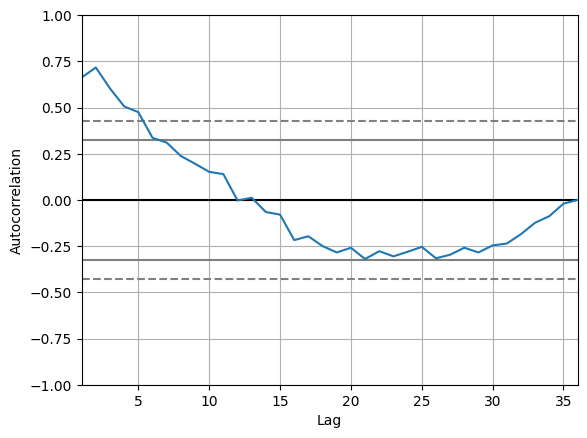

In [6]:
# Autocorrelation plot

autocorrelation_plot(df['Sales'])

Inference from above plot: We can see that there are around 5-6 lag values that fall in 95% confidence interval. So we can take `Q = 5`.

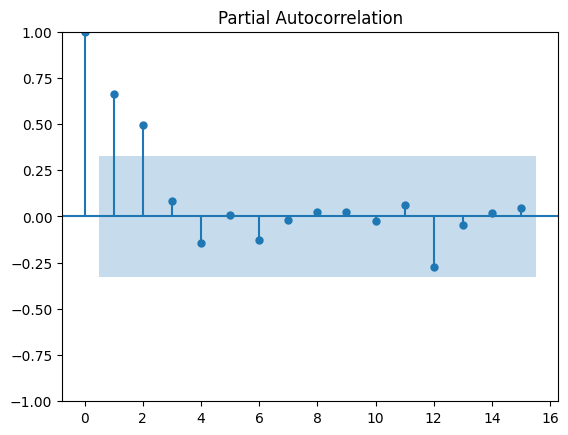

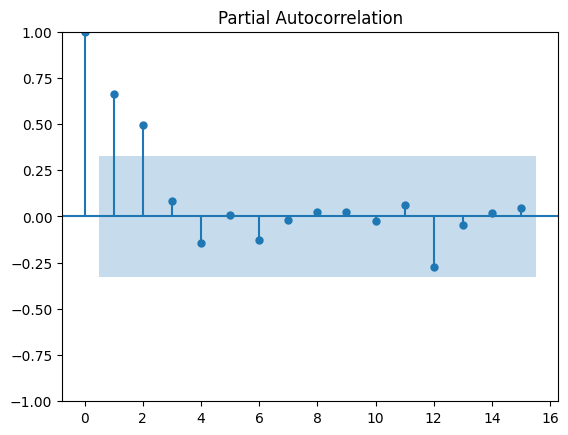

In [7]:
# Partial auto correlation plot

plot_pacf(df['Sales'], lags = 15)

Inference from above plot: We can see that there are around 2 lag values that fall in 95% confidence interval. So we can take `P = 2`.

In [8]:
#As we got all the parameters, we can train the model

model = ARIMA(df['Sales'], order = (2,2,5))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [9]:
# Forecasting the next value

model_fit.forecast()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


36    656.793409
dtype: float64

In [10]:
# Forecasting the next 5 values

model_fit.forecast(5)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


36    656.793409
37    637.268438
38    712.225321
39    710.395923
40    755.773986
Name: predicted_mean, dtype: float64

In [11]:
# Walk forward Validation

# Splitting data into train and test

train, test = df.Sales[:int(df.shape[0]*0.7)], df['Sales'][int(df.shape[0]*0.7):]

In [17]:
data = train
predict = []
for t in test:
  model = ARIMA(data, order = (5,1,0))
  model_fit = model.fit()
  y = model_fit.forecast()
  print(y)
  predict.append(y)
  data = np.append(data,t)
  data = pd.Series(data)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

25    368.668956
dtype: float64
26    335.044741
dtype: float64
27    363.220221
dtype: float64
28    357.645324
dtype: float64
29    443.047835
dtype: float64
30    378.365674
dtype: float64
31    459.415021
dtype: float64
32    526.890876
dtype: float64
33    457.231275
dtype: float64
34    672.914944
dtype: float64
35    531.541449
dtype: float64


In [19]:
# Calculating the MSE

mse = mean_squared_error(test, predict)

In [20]:
mse

9170.052441930586